# Exploratory Analysis of GTD 

In [11]:
# Pandas, numpy, random
import pandas as pd
import numpy as np
import random

# Plots
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

# skleanrn
import sklearn
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Load and Check Data

In [2]:
# load txt file into pandas data frame
gtd = pd.read_excel('globalterrorismdb_0616dist.xlsx')

In [3]:
# take a look of gtd data frame
gtd.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,0,0,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
# take a look of gtd information
gtd.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156772 entries, 0 to 156771
Data columns (total 137 columns):
eventid               int64
iyear                 int64
imonth                int64
iday                  int64
approxdate            object
extended              int64
resolution            object
country               int64
country_txt           object
region                int64
region_txt            object
provstate             object
city                  object
latitude              float64
longitude             float64
specificity           int64
vicinity              int64
location              object
summary               object
crit1                 int64
crit2                 int64
crit3                 int64
doubtterr             float64
alternative           float64
alternative_txt       object
multiple              int64
success               int64
suicide               int64
attacktype1           int64
attacktype1_txt       object
attacktype2           float64


In [11]:
# pd.unique(gtd.gsubname)
pd.set_option('display.max_columns', 137)
gtd.iloc[:5, :137]

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,ingroup,ingroup2,ingroup3,gsubname3,motive,guncertain1,guncertain2,guncertain3,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,0,0,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0.0,NaN,.,0,1,0,1,Assassination,NaN,.,NaN,.,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,.,NaN,.,NaN,NaN,NaN,.,NaN,.,NaN,.,NaN,NaN,NaN,.,MANO-D,NaN,NaN,NaN,NaN,3629,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,.,NaN,NaN,.,NaN,13,Unknown,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,.,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,NaN,Mexico city,19.432608,-99.133207,1,0,NaN,NaN,1,1,1,0.0,NaN,.,0,1,0,6,Hostage Taking (Kidnapping),NaN,.,NaN,.,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,.,NaN,.,NaN,NaN,NaN,.,NaN,.,NaN,.,NaN,NaN,NaN,.,23rd of September Communist League,NaN,NaN,NaN,NaN,3330,NaN,NaN,NaN,NaN,0.0,NaN,NaN,7.0,NaN,NaN,NaN,.,NaN,NaN,.,NaN,NaN,.,NaN,13,Unknown,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,.,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0.0,NaN,.,0,1,0,1,Assassination,NaN,.,NaN,.,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,.,NaN,.,NaN,NaN,NaN,.,NaN,.,NaN,.,NaN,NaN,NaN,.,Unknown,NaN,NaN,NaN,NaN,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,.,NaN,NaN,.,NaN,13,Unknown,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,.,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.983773,23.728157,1,0,NaN,NaN,1,1,1,0.0,NaN,.,0,1,0,3,Bombing/Explosion,NaN,.,NaN,.,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,.,NaN,.,NaN,NaN,NaN,.,NaN,.,NaN,.,NaN,NaN,NaN,.,Unknown,NaN,NaN,NaN,NaN,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,.,NaN,NaN,.,NaN,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,NaN,.,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,.,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,19

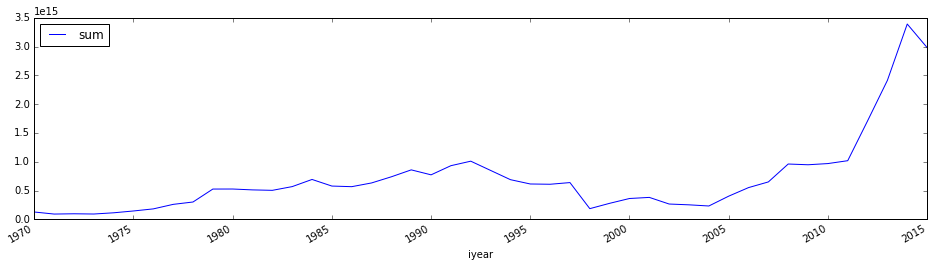

In [65]:
# temp = 
gtd.groupby(['iyear']).eventid.agg([np.sum]).plot(subplots = True,figsize=(16,4))
plt.show()

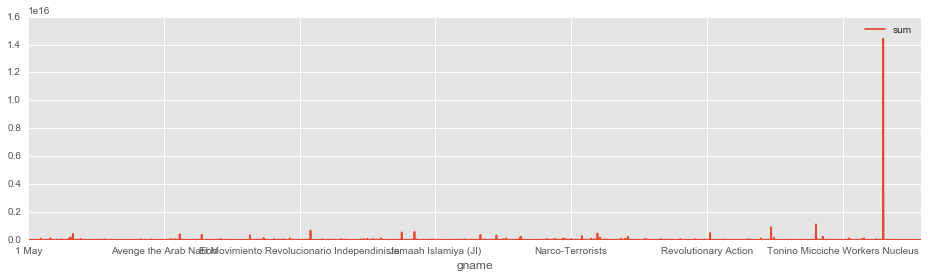

In [8]:
gtd.groupby(['gname']).eventid.agg([np.sum]).plot(figsize=(16,4))
plt.show()

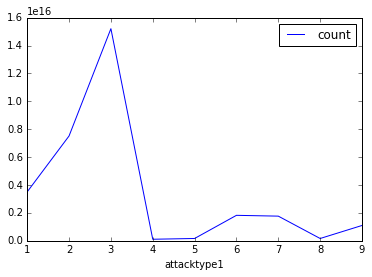

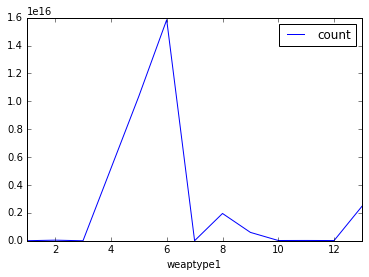

In [123]:
gtd.groupby(['attacktype1']).eventid.agg({'count':sum}).plot()
gtd.groupby(['weaptype1']).eventid.agg({'count':sum}).plot()

In [7]:
# gtd.groupby(['iyear', 'country_txt'])[['eventid']].sum()
pd.unique(gtd.gname)

array([u'MANO-D', u'23rd of September Communist League', u'Unknown', ...,
       u'Raia Mutomboki Militia', u'Lekagak Tenggamati',
       u'Caucasus Province of the Islamic State'], dtype=object)

In [32]:
# gtd.isnull().any()

## 2. Feature Engineering

### 2.1 GTD ID and date

Only include `iyear`, `imonth`, and `extended`. Drop `eventid`, `iday`, `approxdate`, `resolution`

In [70]:
# Create a copy of gtd dataframe
gtd_copy = gtd.copy()

In [71]:
# Drop columns
gtd_copy.drop(['eventid', 'iday', 'approxdate', 'resolution'], axis=1, inplace = True)

In [72]:
# Check null values in iyear, imonth, and extended.
gtd_copy[['iyear', 'imonth', 'extended']].isnull().any()

iyear       False
imonth      False
extended    False
dtype: bool

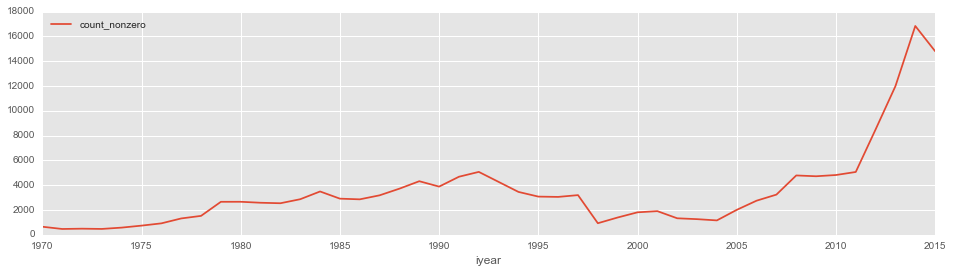

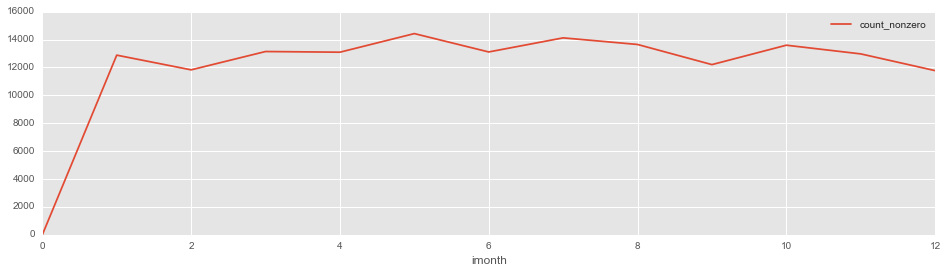

In [73]:
gtd_copy.groupby(['iyear']).iyear.agg([np.count_nonzero]).plot(figsize=(16,4))
gtd_copy.groupby(['imonth']).imonth.agg([np.count_nonzero]).plot(figsize=(16,4))
plt.show()

### 2.2  Incident Information

`summary`, `crit1`, `crit2`, `crit3`, `doubtterr`, `alternative`, `alternative_txt`, `multiple`, `related`

In [74]:
# First, drop column summary, alternative_txt. 
gtd_copy.drop(['summary', 'alternative_txt'], axis=1, inplace=True)

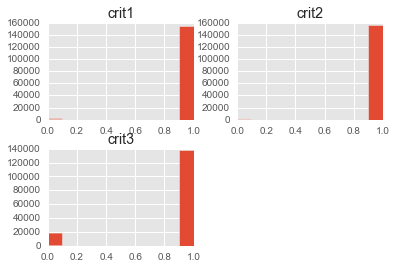

In [75]:
gtd_copy[['crit1', 'crit2', 'crit3']].hist()
plt.show()

In [79]:
gtd_copy[['doubtterr', 'crit1', 'crit2', 'crit3', 'alternative', 'multiple']].notnull().sum()

doubtterr      156771
crit1          156772
crit2          156772
crit3          156772
alternative    156772
multiple       156772
dtype: int64

In [81]:
gtd_copy.alternative.fillna(0, inplace=True)

### 2.3 Incident Information

`country`, `country_txt`, `region`, `region_txt`, `provstate`, `city`, `vicinity`, `location`, `latitude`, `longitude`, `specificity`

In [82]:
# Drop country_txt, region_txt, provstate, city, location, latitude, longitude
gtd_copy.drop(['country_txt', 'region_txt', 'provstate', 'city', 'location', 'latitude', 'longitude'], 
              axis=1, inplace=True)

In [84]:
gtd_copy[['country', 'region', 'vicinity', 'specificity']].isnull().any()

country        False
region         False
vicinity       False
specificity    False
dtype: bool

In [89]:
pd.unique(gtd_copy.region).shape

(12,)

### 2.4  Attack Information

In [165]:
gtd_copy.drop(['attacktype1_txt', 'attacktype2_txt', 'attacktype3_txt'], axis=1, inplace=True)

In [92]:
gtd_copy[['attacktype1', 'attacktype2', 'attacktype3', 'success', 'suicide']].notnull().sum()

attacktype1    156772
attacktype2      4966
attacktype3       312
success        156772
suicide        156772
dtype: int64

In [93]:
# Only 3% of attacktype2 and 0.2% of attacktype3 are not null. It should be safe to drop those columns
gtd_copy.drop(['attacktype2', 'attacktype3'], axis=1, inplace=True)

### 2.5  Weapon Information

In [170]:
gtd_copy.drop(['weaptype1_txt', 'weapsubtype1_txt', 'weaptype2_txt', 'weapsubtype2_txt', 
               'weaptype3_txt', 'weapsubtype3_txt', 'weaptype4_txt', 'weapdetail'], axis=1, inplace=True)

In [94]:
gtd_copy[['weaptype1', 'weapsubtype1', 'weaptype2', 'weapsubtype2', 'weaptype3',
         'weapsubtype3', 'weaptype4']].notnull().sum()

weaptype1       156772
weapsubtype1    138865
weaptype2        10413
weapsubtype2      9295
weaptype3         1432
weapsubtype3      1306
weaptype4           74
dtype: int64

In [95]:
# Drop from weaptype3
gtd_copy.drop(['weaptype3', 'weapsubtype3', 'weaptype4'], axis=1, inplace=True)

In [96]:
# Fill na with 0
gtd_copy[['weapsubtype1', 'weaptype2', 'weapsubtype2']].fillna(0, inplace=True)

### 2.6  Target/Victim Information

In [100]:
gtd_copy.drop(['targtype1_txt', 'targsubtype1_txt', 'natlty1_txt', 'corp1', 'target1'
               'targtype2_txt', 'targsubtype2_txt', 'natlty2_txt', 'corp2', 'target2'
               'targtype3_txt', 'targsubtype3_txt', 'natlty3_txt', 'corp3', 'target3'], axis=1, inplace=True)

In [103]:
gtd_copy[['targtype1', 'targsubtype1', 'natlty1', 
          'targtype2', 'targsubtype2', 'natlty2',
         'targtype3', 'targsubtype3', 'natlty3']].notnull().sum()

targtype1       156772
targsubtype1    148617
natlty1         155544
targtype2         8909
targsubtype2      8469
natlty2           8600
targtype3          932
targsubtype3       860
natlty3            904
dtype: int64

In [182]:
gtd.shape

(156772, 137)

In [184]:
gtd_copy.shape

(156772, 104)

### 2.7  Perpetrator Information

In [117]:
gtd_copy[['gname', 'gsubname', 'gname2', 'gsubname2',
          'gname3', 'gsubname3', 'guncertain1',
         'guncertain2', 'guncertain3', 'nperps', 'nperpcap', 'claimed',
         'claimmode', 'compclaim', 'claim2', 'claimmode2',
         'claim3', 'claimmode3']].notnull().sum()

gname          156772
gsubname         4675
gname2           1219
gsubname2         121
gname3            164
gsubname3           6
guncertain1    156394
guncertain2      1162
guncertain3       160
nperps          85640
nperpcap        87262
claimed         90631
claimmode       13276
compclaim        4609
claim2           1095
claimmode2        405
claim3            158
claimmode3         76
dtype: int64

### 2.8  Casualties and Consequences

In [118]:
gtd_copy[['nkillter', 'nwound', 'property', 'propextent',
          'propvalue', 'ishostkid', 'nhostkid',
         'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransom',
         'ransomamt', 'ransompaid', 'hostkidoutcome', 'nreleased']].notnull().sum()

nkillter           90384
nwound            142572
property          156772
propextent         56352
propvalue          31312
ishostkid         156594
nhostkid           11268
nhours              3302
ndays               6582
divert               289
kidhijcountry       3290
ransom             75092
ransomamt           1195
ransompaid           623
hostkidoutcome      8685
nreleased           8095
dtype: int64

### 2.9  Additional information and Sources

## 3. Prediction

In [38]:
sub_gtd = gtd[['iyear', 'imonth', 'extended', 'crit1', 'crit2', 'crit3',
              'doubtterr', 'alternative', 'multiple', 'country', 'region',
              'vicinity', 'specificity', 'attacktype1',
              'success', 'weaptype1', 'targtype1',
               'property', 'INT_LOG', 'INT_IDEO',
               'INT_MISC', 'INT_ANY',
               'gname']]

sub_gtd2 = gtd[['extended', 'imonth',
              'doubtterr', 'alternative', 'multiple', 'country', 'region',
              'vicinity', 'specificity', 'attacktype1',
              'success', 'weaptype1', 'targtype1',
               'property', 'INT_IDEO', 'INT_LOG',
               'INT_MISC', 'INT_ANY',
               'gname']]

In [6]:
df = ['attacktype2', 'attacktype3', 'weapsubtype1', 'weaptype2',
       'weapsubtype2', 'weaptype3', 'weapsubtype3', 'weaptype4',
       'weapsubtype4', 'targsubtype1', 'natlty1', 'targtype2',
       'targsubtype2', 'natlty2', 'targtype3', 'targsubtype3', 'natlty3',
       'nperps', 'nperpcap', 'claimed', 'claimmode', 'compclaim',
       'claim2', 'claimmode2', 'claim3', 'claimmode3', 'nkill',
       'nkillter', 'nwound', 'nwoundte', 'propextent', 'propvalue',
       'ishostkid', 'nhostkid', 'nhours', 'ndays', 'ransom', 'ransomamt',
       'ransompaid', 'hostkidoutcome', 'nreleased']

In [27]:
# def split(data, target, size):
#     X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=size, random_state=0)
#     return X_train, X_test, y_train, y_test

# def randomForest(train, test):
#     rf = RandomForestClassifier(n_estimators=10, n_jobs=2)
#     rf = rf.fit(train, test)
#     y_pred = rf.predict(test)

In [39]:
le = preprocessing.LabelEncoder()
sub_gtd.gname = le.fit_transform(sub_gtd.gname)
sub_gtd2.gname = le.fit_transform(sub_gtd2.gname)

In [40]:
# Only one nan in doubtterr, drop the row
sub_gtd = sub_gtd[sub_gtd.doubtterr.notnull()]
sub_gtd2 = sub_gtd2[sub_gtd2.doubtterr.notnull()]

In [41]:
# Fill nan with 0 for column alternative
sub_gtd.alternative.fillna(0, inplace=True)
sub_gtd2.alternative.fillna(0, inplace=True)

In [277]:
# sub_gtd.info()

In [46]:
random.seed(123123)
X = sub_gtd.drop('gname', axis=1)
y = sub_gtd.gname

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
clf = RandomForestClassifier(n_estimators=10, n_jobs=2)
clf = clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Get the accuracy score
clf.score(X_test, y_test)

0.82867166321160901

In [42]:
random.seed(123123)
X = sub_gtd2.drop('gname', axis=1)
y = sub_gtd2.gname

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
clf = RandomForestClassifier(n_estimators=10, n_jobs=2)
clf = clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Get the accuracy score
clf.score(X_test, y_test)

0.78663690001594644

In [34]:
importances = clf.feature_importances_
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

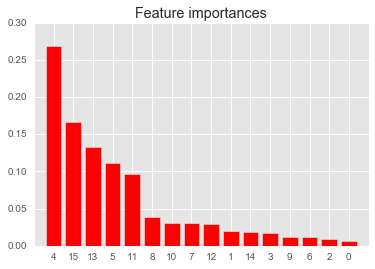

In [35]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [37]:
sub_gtd2.columns[indices]

Index([u'country', u'INT_ANY', u'INT_IDEO', u'region', u'targtype1',
       u'attacktype1', u'weaptype1', u'specificity', u'property', u'doubtterr',
       u'INT_MISC', u'multiple', u'success', u'vicinity', u'alternative',
       u'extended'],
      dtype='object')

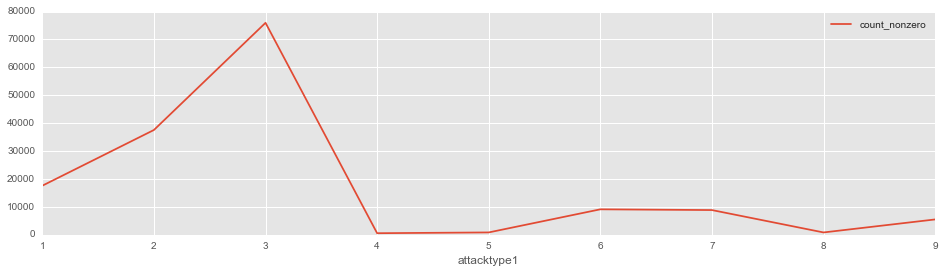

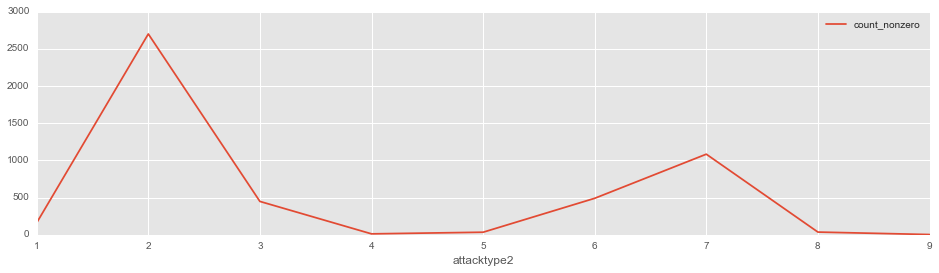

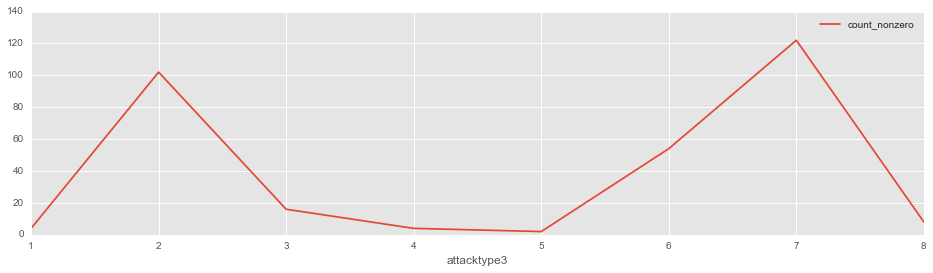

In [273]:
sub_gtd.groupby(['attacktype1']).iyear.agg([np.count_nonzero]).plot(figsize=(16,4))
sub_gtd.groupby(['attacktype2']).iyear.agg([np.count_nonzero]).plot(figsize=(16,4))
sub_gtd.groupby(['attacktype3']).iyear.agg([np.count_nonzero]).plot(figsize=(16,4))
plt.show()

In [296]:
sub_gtd.shape

(156771, 23)

In [297]:
import xgboost as xgb

In [ ]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_pred, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))